In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols

from ginv import *
sympy.init_printing()

In [2]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
PolyDiff.init(var, fun)

([a, b, c, d, e], [u, v, w])

In [3]:
Monom.cmp = Monom.POTlex # POTlex, TOPlex, POTdeglex, TOPdeglex

In [4]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
var, fun = PolyDiff.init(var, fun)
a, b, c, d, e = var
u, v, w = fun
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
p = sympy.diff(a**1*b**2*c**3*d**4*e**5, a, d, 2) + (2*df(w, b, a, 5, b, 2)*e**6 + 13)*a*b + 5 + df(u)
print(f"{p} \n-> {p!r}")
print(f"{p.df_sympy()} \n-> {p!r}")
print(f"{PolyDiff()} -> {PolyDiff()!r}") 

df(u) + df(w, a, 5, b, 3)*2*a*b*e**6 + 13*a*b + 12*b**2*c**3*d**2*e**5 + 5 
-> [[[0;0 0 0 0 0], 1], [[2;5 3 0 0 0], 2*a*b*e**6], [[0 0 0 0 0], 13*a*b + 12*b**2*c**3*d**2*e**5 + 5]]
u(a, b, c, d, e) + w(a, b, c, d, e).diff(a, 5, b, 3)*2*a*b*e**6 + 13*a*b + 12*b**2*c**3*d**2*e**5 + 5 
-> [[[0;0 0 0 0 0], 1], [[2;5 3 0 0 0], 2*a*b*e**6], [[0 0 0 0 0], 13*a*b + 12*b**2*c**3*d**2*e**5 + 5]]
0 -> []


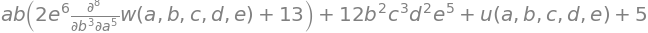

In [5]:
p_diff = sympy.diff(a**1*b**2*c**3*d**4*e**5, a, d, 2) +\
    (2*sympy.diff(w(a, b, c, d, e), b, a, 5, b, 2)*e**6 + 13)*a*b + 5 +\
    u(a, b, c, d, e)
p_diff

In [6]:
p = diff2poly(p_diff)
print(f"{p} \n-> {p!r}")
print(f"{p.df_sympy()} \n-> {p!r}")
print(f"{PolyDiff()} -> {PolyDiff()!r}") 

df(u) + df(w, a, 5, b, 3)*2*a*b*e**6 + 13*a*b + 12*b**2*c**3*d**2*e**5 + 5 
-> [[[0;0 0 0 0 0], 1], [[2;5 3 0 0 0], 2*a*b*e**6], [[0 0 0 0 0], 13*a*b + 12*b**2*c**3*d**2*e**5 + 5]]
u(a, b, c, d, e) + w(a, b, c, d, e).diff(a, 5, b, 3)*2*a*b*e**6 + 13*a*b + 12*b**2*c**3*d**2*e**5 + 5 
-> [[[0;0 0 0 0 0], 1], [[2;5 3 0 0 0], 2*a*b*e**6], [[0 0 0 0 0], 13*a*b + 12*b**2*c**3*d**2*e**5 + 5]]
0 -> []


In [7]:
par = sympy.symbols('alpha, beta, tau, delta, epsilon, zeta', real=True)
par

In [8]:
p = PolyDiff(par[2]**4*21546/par[3])
print(f"{p} -> {p!r}")

21546*tau**4/delta -> [[[0 0 0 0 0], 21546*tau**4/delta]]


In [9]:
p.cancel()
print(f"{p} -> {p!r}")

21546*tau**4 -> [[[0 0 0 0 0], 21546*tau**4]]


In [10]:
h = df(u, c, 5) + a**2*b*par[2]*1236537 + d*par[0]
print(f"{h} \n-> {h!r}")
print(f"{h.df_sympy()} \n-> {h!r}")

df(u, c, 5) + 1236537*a**2*b*tau + alpha*d 
-> [[[0;0 0 5 0 0], 1], [[0 0 0 0 0], 1236537*a**2*b*tau + alpha*d]]
u(a, b, c, d, e).diff(c, 5) + 1236537*a**2*b*tau + alpha*d 
-> [[[0;0 0 5 0 0], 1], [[0 0 0 0 0], 1236537*a**2*b*tau + alpha*d]]


In [11]:
g = PolyDiff(h)
print(g != h)
print(g == h)
print(g > h)

False
True
False


In [12]:
h.lm(), h.lc()

([0;0 0 5 0 0], 1)

In [13]:
p = g.prolong(4)
print(f"{p} \n-> {p!r}")
print(f"{p.df_sympy()} \n-> {p!r}")

df(u, c, 5, e) 
-> [[[0;0 0 5 0 1], 1]]
u(a, b, c, d, e).diff(c, 5, e) 
-> [[[0;0 0 5 0 1], 1]]


In [14]:
g.reduction(0, h)
g

[]

In [15]:
%%time
h *= (4*b**4 + e*par[2] + par[1])**9
print(h)

df(u, c, 5)*(4*b**4 + beta + e*tau)**9 + (1236537*a**2*b*tau + alpha*d)*(4*b**4 + beta + e*tau)**9
CPU times: user 7.36 ms, sys: 0 ns, total: 7.36 ms
Wall time: 9.82 ms


In [16]:
%%time
h.NFtail(4*b**4 + e*par[2] + par[1])
print(h)

df(u, c, 5)*(4*b**4 + beta + e*tau)**9 + (1236537*a**2*b*tau + alpha*d)*(4*b**4 + beta + e*tau)**9
CPU times: user 2.62 ms, sys: 371 µs, total: 2.99 ms
Wall time: 3.28 ms


In [17]:
%%time
h.pp()
print(h)

df(u, c, 5) + 1236537*a**2*b*tau + alpha*d
CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.32 s


In [18]:
type(p) == Poly

False

In [19]:
type(p) == PolyDiff

True

prolong 0, Q 2
df(u, x3, 2)
prolong 0, Q 2
df(u, x1, 2)
prolong 2, Q 0
df(u, x1, x3, 2)
prolong 3, Q 0
df(u, x2, 2, x3)
prolong 2, Q 0
df(u, x2, x3, 2)
prolong 3, Q 0
df(u, x1, x2, 2, x3)
prolong 3, Q 0
df(u, x1, x2, x3, 2)
prolong 4, Q 0
df(u, x2, 4)
prolong 3, Q 0
df(u, x2, 3, x3)
prolong 4, Q 0
df(u, x1, x2, 4)
prolong 4, Q 0
df(u, x1, x2, 3, x3)
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 11
reduction: 29
       HP: 12


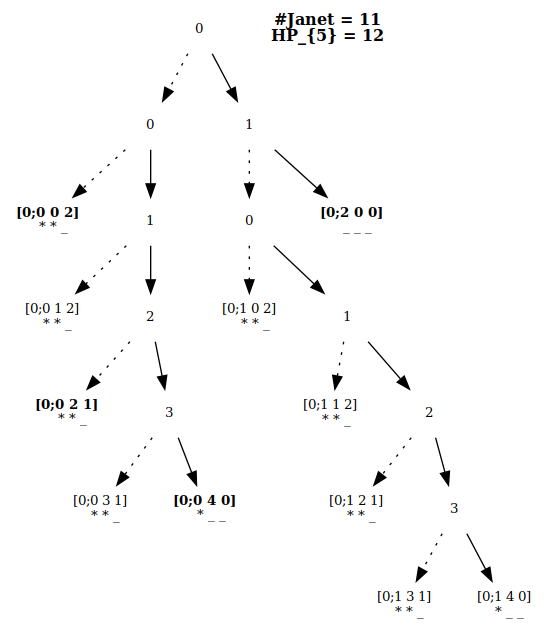

In [20]:
Monom.cmp = Monom.TOPdeglex
var = 'x1, x2, x3'.split(', ')
fun = 'u'.split(', ')
var, fun = PolyDiff.init(var, fun)
x1, x2, x3 = var
u = fun[0]
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
diablo = Janet()
res = ginvBlockLow((
df(u, x1, 2) + x3*df(u, x2, 2),\
df(u, x3, 2)), \
diablo, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {diablo.count()}")
print(f"reduction: {diablo.reduction()}")
print(f"       HP: {diablo.HP()}")
diablo.saveImage('diablo.pdf', level=1)
diablo.saveImage('diablo.png', level=1)
Image('./diablo.png')

In [21]:
for w in diablo:
    print(w.poly)

df(u, x3, 2)
df(u, x2, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 3, x3)
df(u, x2, 4)
df(u, x1, x3, 2)
df(u, x1, x2, x3, 2)
df(u, x1, x2, 2, x3)
df(u, x1, x2, 3, x3)
df(u, x1, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


In [22]:
for w in diablo.GB():
    print(w.poly)

df(u, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


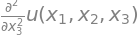

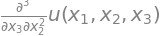

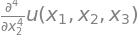

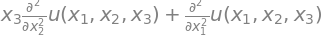

In [23]:
for w in diablo.GB():
    display(eval(w.poly.df_sympy()))

In [24]:
rows, i = {}, 0
for d in range(5):
    for m in Monom.gradus(d, pos=0):
        if not diablo.find(m):
            print(f"${m.df_latex()}$", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число произвольных констант в ряде Тейлора: {len(rows)}")

${u}$, 
${u}_{{x1}}$, ${u}_{{x2}}$, ${u}_{{x3}}$, 
${u}_{{x1} {x2}}$, ${u}_{{x1} {x3}}$, ${u}_{{x2} {x2}}$, ${u}_{{x2} {x3}}$, 
${u}_{{x1} {x2} {x2}}$, ${u}_{{x1} {x2} {x3}}$, ${u}_{{x2} {x2} {x2}}$, 
${u}_{{x1} {x2} {x2} {x2}}$, 
число произвольных констант в ряде Тейлора: 12


In [25]:
T = 0
for d in range(6):
    for m in Monom.gradus(d, pos=0):
        r = PolyDiff(m)
        r.NFhead(diablo)
        if r:
            p = "".join(str(i) for i in m)
            r = sympy.Symbol(f"C_{{{p}}}")
            for i, v in enumerate(m):
                if v:
                    r *= var[i]**v
            T += r
T

In [26]:
eqs = []
for w in diablo.GB():
    eqs.append(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T')).expand())
eqs

In [27]:
def to_eqs(a, var):
    for x in var:
        r = []
        for b in a:
            if b:
                r.append([b.coeff(x, i) for i in range(b.as_poly(x).degree()+1) if b.coeff(x, i)])
        a = chain(*r)
    return list(a)

In [28]:
a = to_eqs(eqs, [x1, x2, x3])
a

In [29]:
sol = sympy.solve(a)
sol

In [30]:
T0 = T.subs(sol)
print(sympy.latex(T0))

C_{000} + C_{001} x_{3} + C_{010} x_{2} + C_{011} x_{2} x_{3} + C_{100} x_{1} + C_{101} x_{1} x_{3} + C_{110} x_{1} x_{2} + C_{111} x_{1} x_{2} x_{3} + C_{201} x_{1}^{2} x_{3} - C_{201} x_{2}^{2} + C_{211} x_{1}^{2} x_{2} x_{3} - \frac{C_{211} x_{2}^{3}}{3} + C_{301} x_{1}^{3} x_{3} - 3 C_{301} x_{1} x_{2}^{2} + C_{311} x_{1}^{3} x_{2} x_{3} - C_{311} x_{1} x_{2}^{3}


In [31]:
for w in diablo.GB():
    print(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T0')).expand(), end=' ')

0 0 0 0 

In [32]:
T0.diff(x2, 2, x3).expand()

In [33]:
(T0.diff(x1, 2) + x3*T0.diff(x2, 2)).expand()

In [34]:
alpha, beta, gamma = sympy.symbols('alpha, beta, gamma', real=True)

var = 't, x, y'.split(', ')
fun = 'A, B, C, D, E'.split(', ')
var, fun = PolyDiff.init(var, fun)
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
t, x, y = var
A, B, C, D, E = fun

In [35]:
eqs = [
df(C, t)*(-1) + df(B, y)*(-2*gamma),
df(A, y),
df(D, y),
df(C, y, 2),
df(E, y, 4)*(-beta*gamma**2) + df(D, t, 3)*(-1),
df(D, y, 4),
df(C, y, 4),
df(B, y, 4),
df(A, y, 4),
df(C, x),
df(B, x)*(-3) + df(C, y)*2 + df(D)*(-1),
df(A, x),
df(D, x),
df(E, x, y, 2)*beta*gamma + df(D, t, 2)*(-1),
df(D, x, y, 2),
df(C, x, y, 2),
df(B, x, y, 2),
df(A, x, y, 2),
df(E, x, 2)*(-beta) + df(D, t)*(-1),
df(D, x, 2),
df(C, x, 2),
df(B, x, 2),
df(A, x, 2),
df(B, t)*(-3) + df(E, x)*(-3*beta) + df(C, y)*2*alpha + df(D)*2*alpha,
df(D, x),
df(C, x),
df(B, x)*(-3) + df(C, y)*2 + df(D)*(-1),
df(A, x),
df(A, t)*3 + df(C, y)*(-4) + df(D)*(-1),
df(C, t, y) + df(D, t)*(-2),
df(E, t, x)*beta + df(E, y, 2)*beta*gamma + df(D, t)*(-alpha),
df(D, t, x) + df(D, y, 2)*gamma,
df(C, t, x) + df(C, y, 2)*gamma,
df(B, t, x) + df(B, y, 2)*gamma,
df(A, t, x) + df(A, y, 2)*gamma,
df(C, t, 2)*(-1) + df(E, x, y)*2*beta*gamma,
df(D, x, y),
df(C, x, y),
df(B, x, y),
df(A, x, y)
]

In [36]:
LRT = Forest(Janet)
res = ginvBlockLow(eqs, LRT, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {LRT.count()}")
print(f"reduction: {LRT.reduction()}")
print(f"       HP: {LRT.HP()}")

prolong 0, Q 1
df(D, y)
prolong 0, Q 1
df(A, y)
prolong 0, Q 1
df(D, x)
prolong 1, Q 1
df(C, x)
prolong 1, Q 1
df(B, x)
prolong 1, Q 1
df(A, x)
prolong 1, Q 1
df(C, t)
prolong 1, Q 1
df(B, t)
prolong 1, Q 1
df(A, t)
prolong 1, Q 2
df(C, y, 2)
prolong 2, Q 2
df(B, y, 2), df(E, x, 2), df(E, t, x)
prolong 2, Q 3
df(E, x, y, 2)
prolong 3, Q 3
df(E, y, 4)
prolong 3, Q 4
prolong 4, Q 0
df(E, t, y, 4)
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.12 sec
    count: 16
reduction: 131
       HP: 5s + 6


In [37]:
for w in LRT.GB():
    print(w.poly)

df(A, y)
df(A, x)
df(A, t)*3 + df(C, y)*-4 + df(D)*-1
df(B, y, 2)*gamma + df(D, t)
df(B, x)*-3 + df(C, y)*2 + df(D)*-1
df(B, t)*-3 + df(E, x)*-3*beta + df(C, y)*2*alpha + df(D)*2*alpha
df(C, y, 2)
df(C, x)
df(C, t)*-1 + df(B, y)*-2*gamma
df(D, y)
df(D, x)
df(E, y, 4)*-beta*gamma**2 + df(D, t, 3)*-1
df(E, x, y, 2)*beta*gamma + df(D, t, 2)*-1
df(E, x, 2)*-beta + df(D, t)*-1
df(E, t, x)*beta + df(E, y, 2)*beta*gamma + df(D, t)*-alpha


In [38]:
x, y, Re = sympy.symbols('x, y, Re', real=True)
u, v, p, f1, f2 = (sympy.Function(f)(t, x, y) for f in 'u, v, p, f1, f2'.split(', '))

In [39]:
eq1 = u.diff(x) + v.diff(y)
eq1

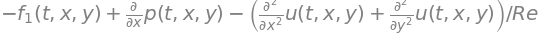

In [40]:
eq2 = p.diff(x) - (u.diff(x, 2) + u.diff(y, 2))/Re - f1
eq2

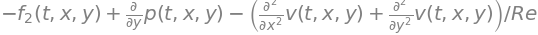

In [41]:
eq3 = p.diff(y) - (v.diff(x, 2) + v.diff(y, 2))/Re - f2
eq3

In [42]:
Monom.cmp = Monom.TOPdeglex
var = 't, x, y'.split(', ')
fun = 'u, v, p, f1, f2'.split(', ')
var, fun = PolyDiff.init(var, fun)
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly

In [43]:
NS = Forest(Janet)
res = ginvBlockLow([diff2poly(eq) for eq in (eq1, eq2, eq3)], \
NS, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {NS.count()}")
print(f"reduction: {NS.reduction()}")
print(f"       HP: {NS.HP(verge=3)}")

prolong 0, Q 1
df(u, x)
prolong 0, Q 2
df(v, x, 2)
prolong 0, Q 2
df(v, x, y)
prolong 2, Q 0
df(p, x, 2)
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 4
reduction: 5
       HP: 2s^2 + 6s + 3


In [44]:
for w in NS:
    print(w.poly)

df(u, x) + df(v, y)
df(v, x, y) + df(u, y, 2)*-1 + df(p, x)*Re + df(f1)*-Re
df(v, x, 2)*-1 + df(v, y, 2)*-1 + df(p, y)*Re + df(f2)*-Re
df(p, x, 2)*-1 + df(p, y, 2)*-1 + df(f1, x) + df(f2, y)


In [45]:
t, x, y, Re = sympy.symbols('t, x, y, Re', real=True)
u, v, p, u2, uv, v2 = (sympy.Function(f)(t, x, y) for f in 'u, v, p, u2, uv, v2'.split(', '))

In [46]:
eq1 = u.diff(x) + v.diff(y)
eq1

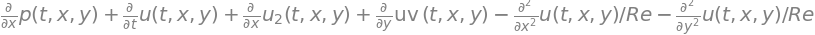

In [47]:
eq2 = u.diff(t) + (u2 + p - u.diff(x)/Re).diff(x) + (uv - u.diff(y)/Re).diff(y)
eq2

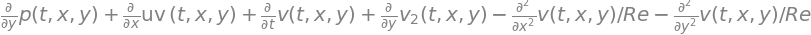

In [48]:
eq3 = v.diff(t) + (uv - v.diff(x)/Re).diff(x) + (v2 + p - v.diff(y)/Re).diff(y)
eq3

In [49]:
Monom.cmp = Monom.TOPdeglex
var = 't, x, y'.split(', ')
fun = 'u, v, p, u2, uv, v2'.split(', ')
var, fun = PolyDiff.init(var, fun)
diff2poly = PolyDiff.diff2poly

In [50]:
for p in [diff2poly(eq) for eq in (eq1, eq2, eq3)]:
    print(" + ".join(f"{m.df_latex()} {sympy.latex(c)}" for m, c in p))

{u}_{{x}} 1 + {v}_{{y}} 1
{u}_{{x} {x}} - \frac{1}{Re} + {u}_{{y} {y}} - \frac{1}{Re} + {u}_{{t}} 1 + {p}_{{x}} 1 + {u2}_{{x}} 1 + {uv}_{{y}} 1
{v}_{{x} {x}} - \frac{1}{Re} + {v}_{{y} {y}} - \frac{1}{Re} + {v}_{{t}} 1 + {uv}_{{x}} 1 + {p}_{{y}} 1 + {v2}_{{y}} 1


In [51]:
NS = Forest(Janet)
res = ginvBlockLow([diff2poly(eq) for eq in (eq1, eq2, eq3)], \
NS, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {NS.count()}")
print(f"reduction: {NS.reduction()}")
print(f"       HP: {NS.HP(verge=3)}")

prolong 0, Q 1
df(u, x)
prolong 0, Q 2
df(v, x, 2)
prolong 0, Q 2
df(v, x, y)
prolong 2, Q 0
df(p, x, 2)
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 4
reduction: 6
       HP: 2s^2 + 6s + 3


In [52]:
for w in NS:
    print(w.poly)

df(u, x) + df(v, y)
df(v, x, y) + df(u, y, 2)*-1 + df(u, t)*Re + df(p, x)*Re + df(u2, x)*Re + df(uv, y)*Re
df(v, x, 2)*-1 + df(v, y, 2)*-1 + df(v, t)*Re + df(uv, x)*Re + df(p, y)*Re + df(v2, y)*Re
df(p, x, 2)*-1 + df(u2, x, 2)*-1 + df(uv, x, y)*-2 + df(p, y, 2)*-1 + df(v2, y, 2)*-1


In [53]:
for w in NS:
    print(" + ".join(f"{m.df_latex()} {sympy.latex(-c)}" for m, c in w.poly))

{u}_{{x}} -1 + {v}_{{y}} -1
{v}_{{x} {y}} -1 + {u}_{{y} {y}} 1 + {u}_{{t}} - Re + {p}_{{x}} - Re + {u2}_{{x}} - Re + {uv}_{{y}} - Re
{v}_{{x} {x}} 1 + {v}_{{y} {y}} 1 + {v}_{{t}} - Re + {uv}_{{x}} - Re + {p}_{{y}} - Re + {v2}_{{y}} - Re
{p}_{{x} {x}} 1 + {u2}_{{x} {x}} 1 + {uv}_{{x} {y}} 2 + {p}_{{y} {y}} 1 + {v2}_{{y} {y}} 1


In [54]:
for i in range(len(fun)):
    print(NS[i].HP())

s^2/2 + 3s/2 + 1
s^2/2 + 5s/2 + 1
s^2 + 2s + 1
s^3/6 + s^2 + 11s/6 + 1
s^3/6 + s^2 + 11s/6 + 1
s^3/6 + s^2 + 11s/6 + 1


In [55]:
HP = NS[0].HP() 
HP += NS[1].HP()
HP += NS[2].HP()
print(HP)

2s^2 + 6s + 3
